In [127]:
%matplotlib inline

import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15, 10)
import numpy as np
import seaborn as sns

## EDA

In [128]:
Badges = pd.read_csv('/Users/esmondchu/Dropbox/160-Stackoverflow-Data/100000_rows_[168_MB]/Badges.csv')
Comments = pd.read_csv('/Users/esmondchu/Dropbox/160-Stackoverflow-Data/100000_rows_[168_MB]/Comments.csv')
PostHistory = pd.read_csv('/Users/esmondchu/Dropbox/160-Stackoverflow-Data/100000_rows_[168_MB]/PostHistory.csv')
Postlinks = pd.read_csv('/Users/esmondchu/Dropbox/160-Stackoverflow-Data/100000_rows_[168_MB]/Postlinks.csv')
Posts = pd.read_csv('/Users/esmondchu/Dropbox/160-Stackoverflow-Data/100000_rows_[168_MB]/Posts.csv')
Users = pd.read_csv('/Users/esmondchu/Dropbox/160-Stackoverflow-Data/100000_rows_[168_MB]/Users.csv')
Votes = pd.read_csv('/Users/esmondchu/Dropbox/160-Stackoverflow-Data/100000_rows_[168_MB]/Votes.csv')

Text(0.5,1,'Posts NA')

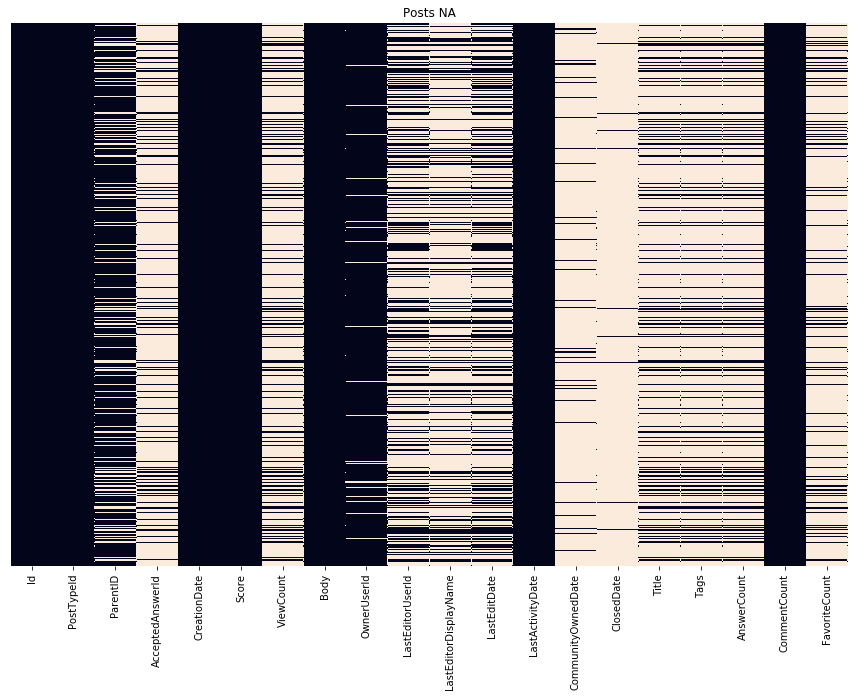

In [129]:
sns.heatmap(Posts.isnull(), yticklabels=False, cbar=False)
plt.title('Posts NA')

In [130]:
Posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
Id                       100000 non-null int64
PostTypeId               100000 non-null int64
ParentID                 81053 non-null float64
AcceptedAnswerId         15069 non-null float64
CreationDate             100000 non-null object
Score                    100000 non-null int64
ViewCount                18947 non-null float64
Body                     100000 non-null object
OwnerUserId              96210 non-null float64
LastEditorUserId         35095 non-null float64
LastEditorDisplayName    21143 non-null object
LastEditDate             35478 non-null object
LastActivityDate         100000 non-null object
CommunityOwnedDate       5502 non-null object
ClosedDate               2047 non-null object
Title                    18947 non-null object
Tags                     18947 non-null object
AnswerCount              18947 non-null float64
CommentCount             100000 non-n

### Answers Posts

In [131]:
import datetime
import calendar

#date to timestamp
def date_ts(s):
    """ 
    param s: str - date
    returns: int - timestamp
    """
    date = datetime.datetime.strptime(s, "%Y-%m-%dT%H:%M:%S")
    st = calendar.timegm(date.utctimetuple())
    return(st)

In [132]:
df_answers = Posts[Posts.PostTypeId == 2]

In [133]:
df_answers = df_answers.reset_index(drop=True)

In [134]:
df_answers.CreationDate = df_answers.CreationDate.str[:-4]

In [135]:
unix_ans = [date_ts(i) for i in df_answers.CreationDate]

In [136]:
df_answers_time = pd.DataFrame({'ParentID':df_answers.ParentID, 'Cr_time':unix_ans})

In [137]:
df_list = df_answers_time.groupby(df_answers_time.ParentID)

In [138]:
uni_par_id = list(df_answers_time.ParentID.unique())

In [139]:
ans_date = [list(df_list.get_group(i).Cr_time) for i in uni_par_id]

In [140]:
yes = 0
no = 0
for i in ans_date:
    if len(i) == 1:
        yes += 1
    else:
        no += 1
print(yes, no)

#there are 2917 posts with only 1 answer, 15773 posts with more than 1 answers.

2917 15773


In [141]:
#set 1-answer post sd to 0
for i in ans_date:
    if len(i) == 1:
        i.append(i[0])
    else:
        i == i

In [142]:
import statistics
ans_time_sd = [statistics.stdev(i) for i in ans_date]

In [143]:
post_Id = sorted(list(df_answers.ParentID.unique()))

In [144]:
post_ans_sd = pd.DataFrame({'post_Id':post_Id, 'time_sd':ans_time_sd})

In [145]:
post_ans_sd.head()

,post_Id,time_sd
0,4.0,1.724331e+06
1,6.0,1.628865e+06
2,9.0,2.005625e+06
3,11.0,1.567259e+06
4,13.0,9.701637e+05


### Parents Posts

In [146]:
Parents_post = Posts[Posts.PostTypeId == 1]

In [147]:
Parents_post = Parents_post.reset_index(drop=True)

In [148]:
Parents_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18947 entries, 0 to 18946
Data columns (total 20 columns):
Id                       18947 non-null int64
PostTypeId               18947 non-null int64
ParentID                 0 non-null float64
AcceptedAnswerId         15069 non-null float64
CreationDate             18947 non-null object
Score                    18947 non-null int64
ViewCount                18947 non-null float64
Body                     18947 non-null object
OwnerUserId              17701 non-null float64
LastEditorUserId         14223 non-null float64
LastEditorDisplayName    9820 non-null object
LastEditDate             14381 non-null object
LastActivityDate         18947 non-null object
CommunityOwnedDate       715 non-null object
ClosedDate               2047 non-null object
Title                    18947 non-null object
Tags                     18947 non-null object
AnswerCount              18947 non-null float64
CommentCount             18947 non-null int64
Favo

In [149]:
df_parents = pd.DataFrame({'post_Id':Parents_post.Id, 'Views_count':Parents_post.ViewCount,\
                           'Score':Parents_post.Score, 'Comment_count':Parents_post.CommentCount})

In [150]:
df_comb = df_parents.join(post_ans_sd.set_index('post_Id'), on='post_Id')

In [151]:
df_comb.head()

,Comment_count,Score,Views_count,post_Id,time_sd
0,1,543,34799.0,4,1.724331e+06
1,0,241,15696.0,6,1.628865e+06
2,16,1716,439828.0,9,2.005625e+06
3,3,1286,130055.0,11,1.567259e+06
4,6,519,149911.0,13,9.701637e+05


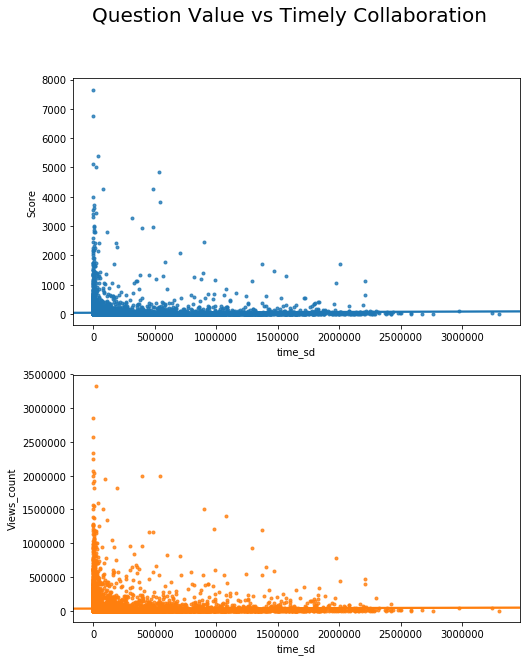

In [152]:
f, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8,10))
plt.suptitle("Question Value vs Timely Collaboration", size=20)
sns.regplot(df_comb.time_sd, df_comb.Score, marker=".", ax=ax1)
sns.regplot(df_comb.time_sd, df_comb.Views_count, marker=".", ax=ax2)

### Data transformation

In [153]:
df_comb.head()

,Comment_count,Score,Views_count,post_Id,time_sd
0,1,543,34799.0,4,1.724331e+06
1,0,241,15696.0,6,1.628865e+06
2,16,1716,439828.0,9,2.005625e+06
3,3,1286,130055.0,11,1.567259e+06
4,6,519,149911.0,13,9.701637e+05


In [154]:
df_comb.Views_count.describe()

count    1.894700e+04
mean     3.093298e+04
std      1.129652e+05
min      5.900000e+01
25%      1.401500e+03
50%      4.288000e+03
75%      1.628700e+04
max      3.328490e+06
Name: Views_count, dtype: float64

In [155]:
df_comb.Score.describe()

count    18947.000000
mean        42.317306
std        201.475094
min         -7.000000
25%          2.000000
50%          6.000000
75%         19.000000
max       7658.000000
Name: Score, dtype: float64

In [156]:
import math
def loga(x):
    val = x+9
    out = 1/math.log10(val)
    return(out)

In [157]:
View_log = df_comb.Views_count.apply(loga)

In [158]:
Scores_log = df_comb.Score.apply(loga)

In [159]:
yes = 0
no = 0
for i in df_comb.Score:
    if i < 0:
        yes += 1
    else:
        no += 1
print(yes, no)

102 18845


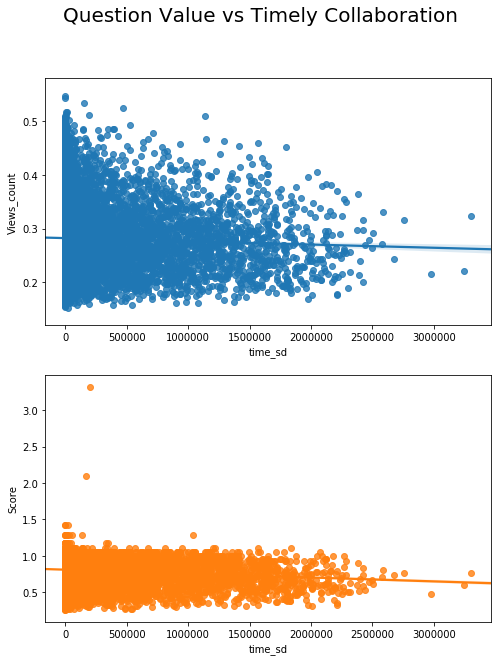

In [160]:
f, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8,10))
plt.suptitle("Question Value vs Timely Collaboration", size=20)
sns.regplot(df_comb.time_sd, View_log, ax=ax1)
sns.regplot(df_comb.time_sd, Scores_log, ax=ax2)

### Probability of a question being answered as a function of time in minutes
eg. $P(\text{question is answered}|t=0,...,n , n=1,...,1440)$ for 

In [161]:
#Parents_post
df_answers

,Id,PostTypeId,ParentID,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditorDisplayName,LastEditDate,LastActivityDate,CommunityOwnedDate,ClosedDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount
0,7,2,4.0,NaN,2008-07-31T22:17:57,391,NaN,<p>An explicit cast to double like this isn't ...,9.0,4020527.0,NaN,2017-12-16T05:06:57.613,2017-12-16T05:06:57.613,NaN,NaN,NaN,NaN,NaN,0,NaN
1,12,2,11.0,NaN,2008-07-31T23:56:41,313,NaN,"<p>Here's how I do it</p>\r\n\r\n<pre class=""l...",1.0,1271898.0,GateKiller,2018-01-12T16:10:22.637,2018-01-12T16:10:22.637,2009-09-04T13:15:59.820,NaN,NaN,NaN,NaN,10,NaN
2,18,2,17.0,NaN,2008-08-01T05:12:44,50,NaN,<p>For a table like this:</p>\r\n\r\n<pre><cod...,NaN,126039.0,Jeff Atwood,2016-06-02T05:56:26.060,2016-06-02T05:56:26.060,NaN,NaN,NaN,NaN,NaN,2,NaN
3,21,2,9.0,NaN,2008-08-01T08:57:27,31,NaN,"<p>Many years ago, to provide an <a href=""http...",13.0,13.0,Chris Jester-Young,2008-08-01T12:35:11.707,2008-08-01T12:35:11.707,2011-08-16T19:40:43.080,NaN,NaN,NaN,NaN,1,NaN
4,22,2,9.0,NaN,2008-08-01T12:07:19,24,NaN,<p>The best way that I know of because of leap...,17.0,17.0,Nick,2008-08-01T15:26:37.087,2008-08-01T15:26:37.087,2011-08-16T19:40:43.080,NaN,NaN,NaN,NaN,0,NaN
5,26,2,17.0,NaN,2008-08-01T12:16:22,122,NaN,<p>The answer by phpguy is correct but I think...,48.0,126039.0,Geoff Dalgas,2016-06-02T05:55:17.060,2016-06-02T05:55:17.060,NaN,NaN,NaN,NaN,NaN,0,NaN
6,27,2,11.0,NaN,2008-08-01T12:17:19,28,NaN,<p>@jeff</p>\r\n\r\n<p>IMHO yours seems a litt...,17.0,17.0,Nick Berardi,2008-08-01T13:16:49.127,2008-08-01T13:16:49.127,2009-09-04T13:15:59.820,NaN,NaN,NaN,NaN,0,NaN
7,29,2,13.0,NaN,2008-08-01T12:19:17,73,NaN,<p>There are no HTTP headers that will report ...,19.0,NaN,NaN,NaN,2008-08-01T12:19:17.417,NaN,NaN,NaN,NaN,NaN,4,NaN
8,30,2,25.0,NaN,2008-08-01T12:22:40,32,NaN,<p>I've had no trouble using the BSD sockets A...,13.0,NaN,NaN,NaN,2008-08-01T12:22:40.797,NaN,NaN,NaN,NaN,NaN,0,NaN
9,31,2,6.0,NaN,2008-08-01T12:22:51,127,NaN,<p>The parent <code>div</code> needs to have a...,NaN,63550.0,NaN,2016-03-19T06:10:52.170,2016-03-19T06:10:52.170,NaN,NaN,NaN,NaN,NaN,0,NaN


In [162]:
df_answers_time.head()

,Cr_time,ParentID
0,1217542677,4.0
1,1217548601,11.0
2,1217567564,17.0
3,1217581047,9.0
4,1217592439,9.0


In [163]:
parents_time = Parents_post.CreationDate.str[:-4]

In [164]:
unix_parents = [date_ts(i) for i in parents_time]

In [165]:
df_parents_time = pd.DataFrame({'Cr_time_parents':unix_parents, 'ParentID':Parents_post.Id})

In [166]:
df_parents_time.head()

,Cr_time_parents,ParentID
0,1217540572,4
1,1217542088,6
2,1217547659,9
3,1217548537,11
4,1217551358,13


In [167]:
df_compare = pd.merge(df_parents_time, df_answers_time, on='ParentID')

In [168]:
df_compare.head()

,Cr_time_parents,ParentID,Cr_time
0,1217540572,4,1217542677
1,1217540572,4,1217598786
2,1217540572,4,1217600608
3,1217540572,4,1217967510
4,1217540572,4,1218390867


In [169]:
df_compare['Duration'] = df_compare.Cr_time - df_compare.Cr_time_parents

In [170]:
df_compare['Duration_mins'] = df_compare.Duration/60

In [174]:
df_compare['Duration_hours'] = df_compare.Duration_mins/60

In [175]:
df_compare

,Cr_time_parents,ParentID,Cr_time,Duration,Duration_mins,Duration_hours
0,1217540572,4,1217542677,2105,35.083333,0.584722
1,1217540572,4,1217598786,58214,970.233333,16.170556
2,1217540572,4,1217600608,60036,1000.600000,16.676667
3,1217540572,4,1217967510,426938,7115.633333,118.593889
4,1217540572,4,1218390867,850295,14171.583333,236.193056
5,1217540572,4,1221969061,4428489,73808.150000,1230.135833
6,1217542088,6,1217593371,51283,854.716667,14.245278
7,1217542088,6,1217915663,373575,6226.250000,103.770833
8,1217542088,6,1220518962,2976874,49614.566667,826.909444
9,1217547659,9,1217581047,33388,556.466667,9.274444


In [172]:
df_compare.Duration_mins.describe()

count    80995.000000
mean      2283.904162
std       8624.629899
min     -44770.133333
25%          7.183333
50%         23.300000
75%        185.325000
max      87521.316667
Name: Duration_mins, dtype: float64

In [173]:
neg = 0
pos = 0
for i in df_compare.Duration_mins:
    if i >= 0:
        pos += 1
    else:
        neg += 1
print(pos, neg)

80980 15
